In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [6]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3).zip


Found 520 files belonging to 1 classes.
Using 416 files for training.
Found 520 files belonging to 1 classes.
Using 104 files for validation.
✅ Classes: ['Ghibli']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 987ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 992ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 989ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 984ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 984ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1000ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1

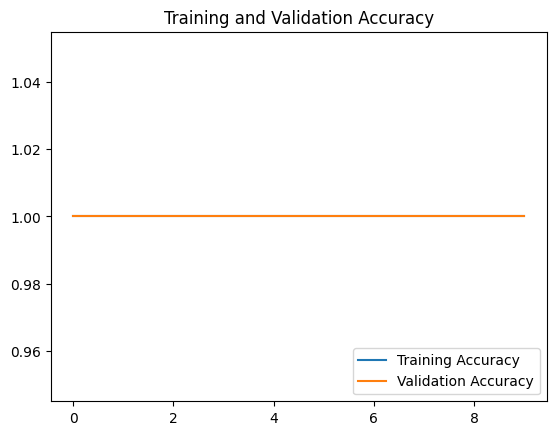

In [10]:
import zipfile
import os
import tensorflow as tf
import matplotlib.pyplot as plt


zip_path = "archive (3).zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


image_size = (180, 180)
batch_size = 32


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    extract_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    extract_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("✅ Classes:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))  # Output layer
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


In [11]:

train_image_count = 0
for _ in train_ds:
    train_image_count += 1

val_image_count = 0
for _ in val_ds:
    val_image_count += 1

print(f"Training batches: {train_image_count}")
print(f"Validation batches: {val_image_count}")



Training batches: 13
Validation batches: 4


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt


In [20]:
zip_path = "archive (3).zip"
extract_path = "/content/dataset"

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


full_dataset = datasets.ImageFolder(root=extract_path, transform=transform)
class_names = full_dataset.classes


train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [21]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN(num_classes=len(class_names)).to(device)


In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
train_acc_list, val_acc_list = [], []
train_loss_list, val_loss_list = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)


    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


Epoch 1/10 — Train Acc: 1.0000, Val Acc: 1.0000
Epoch 2/10 — Train Acc: 1.0000, Val Acc: 1.0000
Epoch 3/10 — Train Acc: 1.0000, Val Acc: 1.0000
Epoch 4/10 — Train Acc: 1.0000, Val Acc: 1.0000
Epoch 5/10 — Train Acc: 1.0000, Val Acc: 1.0000
Epoch 6/10 — Train Acc: 1.0000, Val Acc: 1.0000
Epoch 7/10 — Train Acc: 1.0000, Val Acc: 1.0000
Epoch 8/10 — Train Acc: 1.0000, Val Acc: 1.0000
Epoch 9/10 — Train Acc: 1.0000, Val Acc: 1.0000
Epoch 10/10 — Train Acc: 1.0000, Val Acc: 1.0000


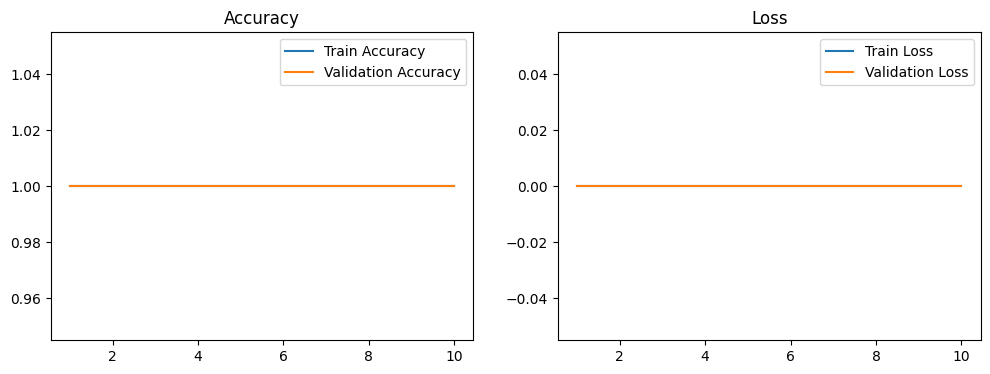

In [23]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc_list, label='Train Accuracy')
plt.plot(epochs, val_acc_list, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss_list, label='Train Loss')
plt.plot(epochs, val_loss_list, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
